In [121]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

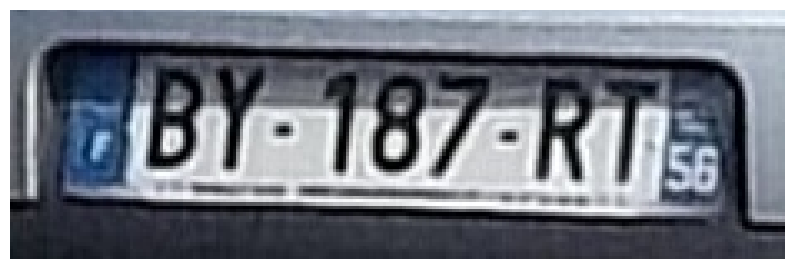

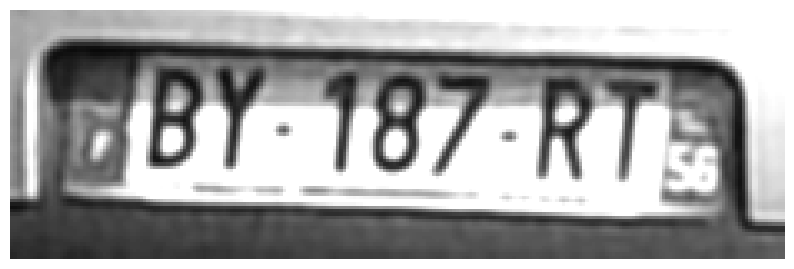

In [125]:

# Función para mostrar imágenes con Matplotlib
def mostrar_imagen(imagen):
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Cargar la imagen de la matrícula
imagen_path = './matriculas-europeas/train/BY187RT.jpg'
imagen = cv2.imread(imagen_path)
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
imagen_suavizada = cv2.GaussianBlur(imagen_gris, (5, 5), 0)
imagen_contraste = cv2.convertScaleAbs(imagen_suavizada, alpha=1.5, beta=0)



imagen_toCheck = imagen_contraste


# Mostrar la imagen
mostrar_imagen(imagen)
mostrar_imagen(imagen_toCheck)


In [123]:
matriculas_europeas = [
    'AL',  # Albania
    'AND', # Andorra
    'ARM', # Armenia
    'A',   # Austria
    'AZ',  # Azerbaiyán
    'BY',  # Bielorrusia
    'B',   # Bélgica
    'BIH', # Bosnia y Herzegovina
    'BG',  # Bulgaria
    'HR',  # Croacia
    'CY',  # Chipre
    'CZ',  # República Checa
    'DK',  # Dinamarca
    'EST', # Estonia
    'FIN', # Finlandia
    'F',   # Francia
    'GE',  # Georgia
    'D',   # Alemania
    'GR',  # Grecia
    'H',   # Hungría
    'IS',  # Islandia
    'IRL', # Irlanda
    'I',   # Italia
    'KZ',  # Kazajistán (parte en Europa)
    'XK',  # Kosovo
    'LV',  # Letonia
    'FL',  # Liechtenstein (anteriormente 'L')
    'LT',  # Lituania
    'L',   # Luxemburgo
    'MK',  # Macedonia del Norte
    'M',   # Malta
    'MD',  # Moldavia
    'MC',  # Mónaco
    'ME',  # Montenegro
    'NL',  # Países Bajos
    'N',   # Noruega
    'PL',  # Polonia
    'P',   # Portugal
    'RO',  # Rumania
    'RUS', # Rusia
    'SM',  # San Marino
    'SRB', # Serbia
    'SK',  # Eslovaquia
    'SLO', # Eslovenia
    'E',   # España
    'S',   # Suecia
    'CH',  # Suiza
    'TR',  # Turquía
    'UA',  # Ucrania
    'GB',  # Reino Unido
    'VA'   # Ciudad del Vaticano
]


Using CPU. Note: This module is much faster with a GPU.


Matrícula: BY 187-RV, Probabilidad: 0.32740718170007954


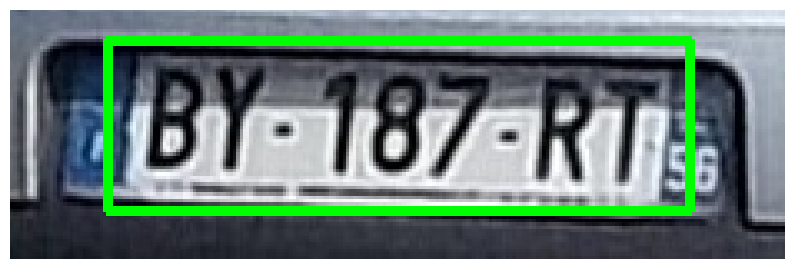

In [128]:

# Inicializar el lector OCR
lector = easyocr.Reader(['en'], gpu=False)  # Idioma en para inglés

# Realizar la lectura OCR
resultado = lector.readtext(imagen_toCheck, detail=1)

img_resultado = imagen.copy()

# Mostrar los resultados
for (bbox, texto, probabilidad) in resultado:
    # Dibujar el cuadro delimitador alrededor del texto
    (arriba_izq, arriba_der, abajo_der, abajo_izq) = bbox
    arriba_izq = tuple([int(val) for val in arriba_izq])
    abajo_der = tuple([int(val) for val in abajo_der])
    
    
    if texto in matriculas_europeas:
        cv2.rectangle(img_resultado, arriba_izq, abajo_der, (0, 255, 0), 2)
        print(f"País: {texto}, Probabilidad: {probabilidad}")
        cv2.putText(img_resultado, texto, (arriba_izq[0], arriba_izq[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    elif len(texto) >= 6 and len(texto) <= 10 and probabilidad > 0.2:
        cv2.rectangle(img_resultado, arriba_izq, abajo_der, (0, 255, 0), 2)
        print(f"Matrícula: {texto}, Probabilidad: {probabilidad}")

        

# Mostrar la imagen con los resultados
mostrar_imagen(img_resultado)
